# Preprosesamiento

## Librerias

In [238]:
# Instalación de librerias

import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
import seaborn as sns

import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve, plot_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from tqdm import tqdm

import nltk

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer

## Preparación de datos

In [2]:
# Leer archivo de datos con texto normalizado

data_normalized_text = pd.read_csv('DatosSuicidio/DatosTextoNormalizado.csv', sep=',', encoding = 'utf-8', index_col = 0)

data_normalized_text.head()

,id,text,class,words
0,173271,want destroy myselffor everyth start feel okay...,suicide,"['want', 'destroy', 'myselffor', 'everyth', 's..."
1,336321,kind got behind schedul learn next week testwe...,non-suicide,"['kind', 'got', 'behind', 'schedul', 'learn', ..."
2,256637,sure anymorefirst foremost brazil judg second ...,suicide,"['sure', 'anymorefirst', 'foremost', 'brazil',..."
3,303772,pleas give reason livethat much reason live li...,suicide,"['pleas', 'give', 'reason', 'livethat', 'much'..."
4,293747,27f struggl find mean move forwardi admit bit ...,suicide,"['27f', 'struggl', 'find', 'mean', 'move', 'fo..."


In [3]:
data_normalized_text['words'] = data_normalized_text['words'].apply(literal_eval)
data_normalized_text.head()

,id,text,class,words
0,173271,want destroy myselffor everyth start feel okay...,suicide,"[want, destroy, myselffor, everyth, start, fee..."
1,336321,kind got behind schedul learn next week testwe...,non-suicide,"[kind, got, behind, schedul, learn, next, week..."
2,256637,sure anymorefirst foremost brazil judg second ...,suicide,"[sure, anymorefirst, foremost, brazil, judg, s..."
3,303772,pleas give reason livethat much reason live li...,suicide,"[pleas, give, reason, livethat, much, reason, ..."
4,293747,27f struggl find mean move forwardi admit bit ...,suicide,"[27f, struggl, find, mean, move, forwardi, adm..."


In [4]:
data_normalized_text = data_normalized_text.dropna()

In [5]:
X_data, y_data = data_normalized_text['text'],data_normalized_text['class']
y_data = (y_data == 'suicide').astype(int)
y_data

0         1
1         0
2         1
3         1
4         1
         ..
195695    0
195696    0
195697    0
195698    0
195699    1
Name: class, Length: 195668, dtype: int64

In [6]:
tfidf = TfidfVectorizer(min_df = 10, max_df =0.5)
X_tf_idf = tfidf.fit_transform(X_data)
print(X_tf_idf.shape)

(195668, 25662)


In [12]:
X_tf_idf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [8]:
tfidf.vocabulary_

{'want': 24816,
 'destroy': 6493,
 'myselffor': 15077,
 'everyth': 8278,
 'start': 21530,
 'feel': 8869,
 'okay': 15846,
 'came': 3806,
 'tumbl': 23492,
 'know': 13013,
 'use': 24327,
 'cope': 5320,
 'reason': 18403,
 'tear': 22484,
 'skin': 20684,
 'shred': 20449,
 'swallow': 22231,
 'everi': 8260,
 'pill': 16965,
 'find': 9042,
 'right': 19285,
 'alon': 1529,
 'room': 19421,
 'wall': 24784,
 'slowli': 20811,
 'fall': 8697,
 'matter': 14137,
 'time': 22919,
 'snap': 20896,
 'final': 9026,
 'end': 7921,
 'everything': 8280,
 'starting': 21533,
 'tumbling': 23494,
 'used': 24328,
 'tearing': 22488,
 'swallowing': 22233,
 'every': 8268,
 'alone': 1530,
 'slowly': 20812,
 'falling': 8703,
 'finally': 9032,
 'kind': 12956,
 'got': 10186,
 'behind': 2863,
 'schedul': 19774,
 'learn': 13210,
 'next': 15354,
 'week': 24965,
 'eight': 7683,
 'test': 22630,
 'four': 9447,
 'alreadi': 1547,
 'studi': 21841,
 'two': 23562,
 'good': 10137,
 'minim': 14550,
 'anyth': 1900,
 'yet': 25548,
 'still': 

In [ ]:
# procesed_data['suicide'] = y_data
# procesed_data

,0,1,2,3,4,5,6,7,8,9,...,3232,3233,3234,3235,3236,3237,3238,3239,3240,suicide
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.122788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195663,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195664,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195665,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195666,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_data.value_counts()

0    110141
1     85527
Name: class, dtype: int64

(array([110141.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  85527.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

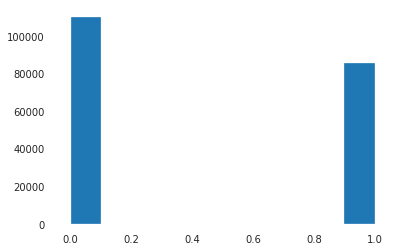

In [15]:
plt.hist(y_data)

# Modelos de clasificación

# Naive-Bayes : BernoulliNB

In [252]:
# Selección de parámetros
parameters = [{'alpha':np.linspace(0.00001,1,10)}]

nb = GridSearchCV(estimator=BernoulliNB(), param_grid=parameters, verbose=1, cv=10, n_jobs=-1, scoring='f1')

nb.fit(X_train, Y_train)
print(nb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
BernoulliNB(alpha=1e-05)


In [253]:
# Determinar las predicciones del modelo sobre el conjunto de prueba
y_pred = nb.predict(X_test)

# Generar matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
cm

array([[20036,  1901],
       [ 5538, 11659]])

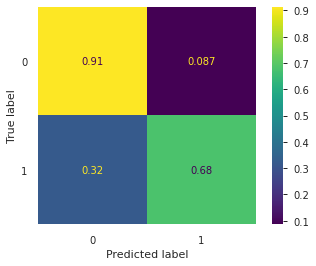

In [254]:
ConfusionMatrixDisplay.from_estimator(
     nb, X_test, Y_test, normalize='true')

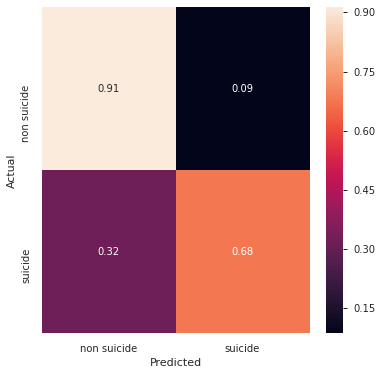

In [255]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['non suicide','suicide'], yticklabels=['non suicide','suicide'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [256]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     21937
           1       0.86      0.68      0.76     17197

    accuracy                           0.81     39134
   macro avg       0.82      0.80      0.80     39134
weighted avg       0.82      0.81      0.81     39134



In [257]:
# Scores modelo general
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Recall: 0.6779670872826655
Precisión: 0.8598082595870207
Puntuación F1: 0.7581363592027831


In [258]:
from joblib import dump, load
dump(nb, 'BernoulliNB.joblib') 

['BernoulliNB.joblib']

# Naive-Bayes : MultinomialNB

In [8]:
# Dividir datos en entrenamiento (80%) y test (20%)

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, y_data, test_size=0.2, random_state=0)

In [244]:
# Selección de parámetros
parameters = [{'alpha':np.linspace(0.00001,1,10)}]

nbM = GridSearchCV(estimator=MultinomialNB(), param_grid=parameters, verbose=1, cv=10, n_jobs=-1, scoring='f1')

nbM.fit(X_train, Y_train)
print(nbM.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
MultinomialNB(alpha=0.11112)


In [245]:
# Determinar las predicciones del modelo sobre el conjunto de prueba
y_pred = nbM.predict(X_test)

# Generar matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
cm

array([[19647,  2290],
       [ 1023, 16174]])

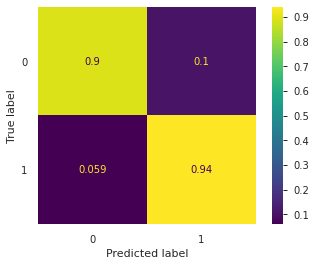

In [246]:
ConfusionMatrixDisplay.from_estimator(
     nbM, X_test, Y_test, normalize='true')

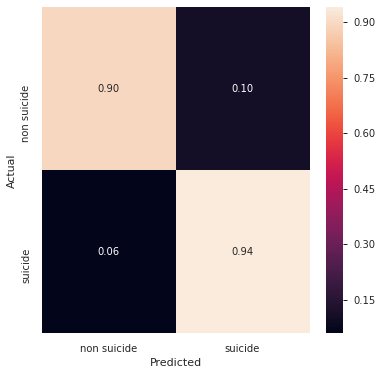

In [248]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['non suicide','suicide'], yticklabels=['non suicide','suicide'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [249]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     21937
           1       0.88      0.94      0.91     17197

    accuracy                           0.92     39134
   macro avg       0.91      0.92      0.91     39134
weighted avg       0.92      0.92      0.92     39134



In [250]:
# Scores modelo general
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Recall: 0.9405128801535152
Precisión: 0.875974870017331
Puntuación F1: 0.9070973893048427


In [251]:
from joblib import dump, load
dump(nb, 'MultinomialNB.joblib') 

['MultinomialNB.joblib']

#  Support Vector Machine - LinearSVC

In [269]:
# Selección de parámetros
parameters = [{'C':np.linspace(0.01,10,10)}]

svm = GridSearchCV(estimator=LinearSVC(), param_grid=parameters, verbose=1, cv=5, n_jobs=-1, scoring='recall')

svm.fit(X_train, Y_train)
print(svm.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
LinearSVC(C=1.12)


In [270]:
svm.best_params_

{'C': 1.12}

In [271]:
# Determinar las predicciones del modelo sobre el conjunto de prueba

y_pred = svm.predict(X_test)

In [272]:
# Generar matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
cm

array([[20998,   939],
       [ 1402, 15795]])

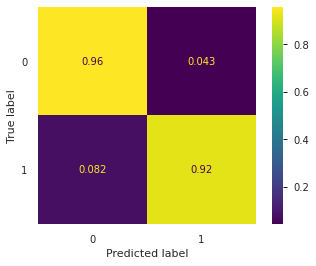

In [97]:
ConfusionMatrixDisplay.from_estimator(
     svm, X_test, Y_test, normalize='true')

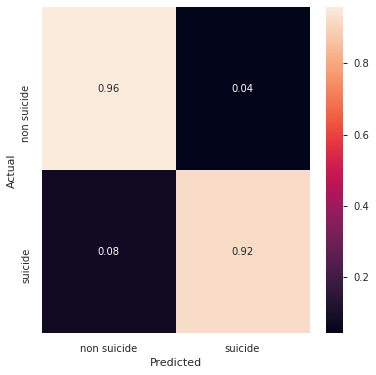

In [273]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['non suicide','suicide'], \
            yticklabels=['non suicide','suicide'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     21937
           1       0.94      0.92      0.93     17197

    accuracy                           0.94     39134
   macro avg       0.94      0.94      0.94     39134
weighted avg       0.94      0.94      0.94     39134



In [89]:
# Scores modelo general
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Recall: 0.9184741524684538
Precisión: 0.9438866977411259
Puntuación F1: 0.9310070437063452


In [113]:
from joblib import dump, load
dump(svm, 'linearSVC.joblib') 

['linearSVC.joblib']

## Feature importances

In [193]:
ind, names = zip(*sorted(zip(tfidf.vocabulary_.values(),tfidf.vocabulary_.keys())))
names=list(names)

In [262]:
impSVM_ = list(svm.best_estimator_.coef_[0])
impNB_ = list(nb.best_estimator_.coef_[0])
impNBM_ = list(nbM.best_estimator_.coef_[0])

In [264]:
impNB,namesNB = zip(*sorted(zip(impNB_,names)))
impSVM,namesSVM = zip(*sorted(zip(impSVM_,names)))
impNBM,namesNBM = zip(*sorted(zip(impNBM_,names)))

In [265]:
print(namesNB[-25:])
print(namesNBM[-25:])
print(namesSVM[-25:])

('kill', 'realli', 'really', 'suicid', 'make', 'friend', 'thing', 'live', 'peopl', 'people', 'year', 'tri', 'going', 'even', 'one', 'think', 'time', 'would', 'get', 'life', 'know', 'like', 'feel', 'go', 'want')
('thought', 'make', 'end', 'much', 'live', 'day', 'never', 'die', 'help', 'kill', 'thing', 'friend', 'year', 'one', 'think', 'even', 'time', 'go', 'get', 'would', 'like', 'know', 'life', 'feel', 'want')
('upi', 'worldi', 'shiti', 'alonei', 'sw', 'herei', 'suicide', 'suicidali', 'suicidal', 'kill', 'friendi', 'thisi', 'todayi', 'donei', 'suicidei', 'retard', 'doi', 'lifei', 'diei', 'mei', 'helpi', 'myselfi', 'iti', 'anymorei', 'suicid')


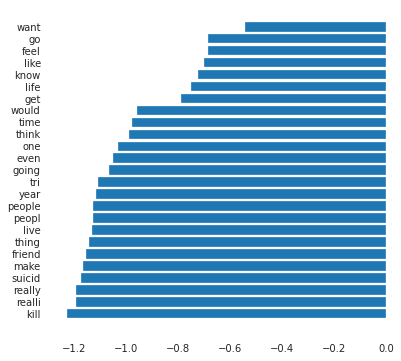

('kill', 'realli', 'really', 'suicid', 'make', 'friend', 'thing', 'live', 'peopl', 'people', 'year', 'tri', 'going', 'even', 'one', 'think', 'time', 'would', 'get', 'life', 'know', 'like', 'feel', 'go', 'want')
[-1.2269 -1.1933 -1.1933 -1.1725 -1.1653 -1.1561 -1.1416 -1.1331 -1.128
 -1.128  -1.1179 -1.1082 -1.0651 -1.0503 -1.0307 -0.9907 -0.976  -0.9567
 -0.7905 -0.7523 -0.7242 -0.7008 -0.6866 -0.6851 -0.5429]


In [236]:
def f_importances(coef, names_, n):
    fig, ax = plt.subplots(figsize=(6,6))
    imp = coef
    imp,names1 = zip(*sorted(zip(imp,names_)))
    plt.barh(range(len(names1[n:])), imp[n:], align='center')
    plt.yticks(range(len(names1[n:])), names1[n:])
    plt.show()
    print(names1[n:])
    print(np.round(imp[n:],4))
    return np.round(imp,4), names1

impNB,namesNB = f_importances(impNB_, names,-25)

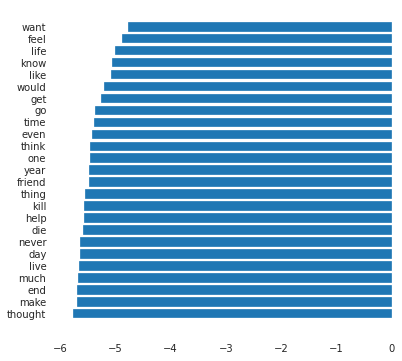

('thought', 'make', 'end', 'much', 'live', 'day', 'never', 'die', 'help', 'kill', 'thing', 'friend', 'year', 'one', 'think', 'even', 'time', 'go', 'get', 'would', 'like', 'know', 'life', 'feel', 'want')
[-5.7694 -5.7033 -5.687  -5.6796 -5.6638 -5.6496 -5.6343 -5.595  -5.5706
 -5.5597 -5.5587 -5.4814 -5.4741 -5.4591 -5.4549 -5.43   -5.3817 -5.371
 -5.2582 -5.2016 -5.0749 -5.0623 -5.0032 -4.8772 -4.7686]


In [266]:
impNBM,namesNBM = f_importances(impNBM_, names,-25)

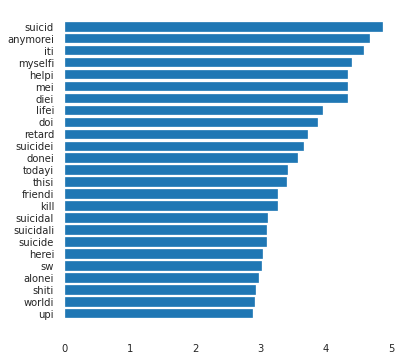

('upi', 'worldi', 'shiti', 'alonei', 'sw', 'herei', 'suicide', 'suicidali', 'suicidal', 'kill', 'friendi', 'thisi', 'todayi', 'donei', 'suicidei', 'retard', 'doi', 'lifei', 'diei', 'mei', 'helpi', 'myselfi', 'iti', 'anymorei', 'suicid')
[2.8929 2.9243 2.9269 2.9819 3.0181 3.0382 3.0954 3.108  3.1116 3.2643
 3.2645 3.4051 3.4159 3.5779 3.6724 3.724  3.8767 3.9626 4.3342 4.3449
 4.3456 4.3995 4.5933 4.6734 4.8842]


In [237]:
impSVM,namesSVM = f_importances(impSVM_, names,-25)

In [267]:
impSVM[:10],impNB[:10], impNBM[:10]

((-2.405531688611753,
  -2.3033298649403884,
  -2.272593790606264,
  -2.258056237950081,
  -2.222284961158602,
  -2.1647238505679933,
  -2.162769444416735,
  -2.155831737098275,
  -2.1543625799572896,
  -2.1537674832721723),
 (-22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775,
  -22.64502965303775),
 array([-15.3345, -15.3345, -15.3345, -15.3345, -15.3345, -15.3345,
        -15.3345, -15.3345, -15.3345, -15.3345]))